# Introducción a Python scikit-learn con los pingüinos

En este ejercicio haremos uso de scikit para generar un estimador lineal que nos permita estimar de que especie es un pingüino en base a la medida de dos de sus dimensiones.



Para generar un modelo de aprendizaje de máquina, necesitamos varios pasos previos a procesar nuestra información.
Procedemos a cargar el dataset de pinguinos, posteriormente limpiamos los datos, separamos los datos en un grupo de prueba y uno de entrenamiento y finalmente generamos el modelo.




In [4]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

El dataset de pinguinos


In [5]:
# igual a
# p_df = sns.load_dataset("penguins")
p_df = pd.read_csv("penguins_size.csv")
p_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Describiendo los datos

Culmen, de sues en raiz del latin la parte superior del pico.


Existen 7 columnas

* species: specie
* island: la isla encontrada el pinguino
* culmen_length: longitud pico
* culmen width: ancho pico
* flipper lenght: aletas

In [7]:
p_df.describe(include="all")


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [8]:
print("La matriz de covarianza:")
p_df.cov()

La matriz de covarianza:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [9]:
print("La matriz de correlacion:")
p_df.corr()

La matriz de correlacion:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Limpiar nulos

*es muy importante en particular con estos metodos*



In [10]:
print(p_df.isnull().sum())
p_df.dropna(inplace=True)
## la forma sofisticada

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
#p_df=imputer.fit_transform(p_df)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [11]:
# ya sin nulos
print(p_df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Comenzamos con sklearn

Importamos de sklearn



In [12]:
!pip install sklearn
!pip install scikit-learn


In [13]:
import sklearn as sks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
lb = LabelEncoder()

In [15]:
p_df['sex'] = lb.fit_transform(p_df["sex"])
p_df['sex'].head()

0    2
1    1
2    1
4    1
5    2
Name: sex, dtype: int64

In [16]:
p_df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

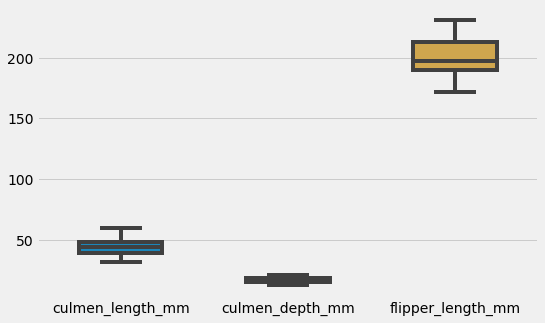

In [17]:
simple_df = p_df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=simple_df, width=0.5,fliersize=5)

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


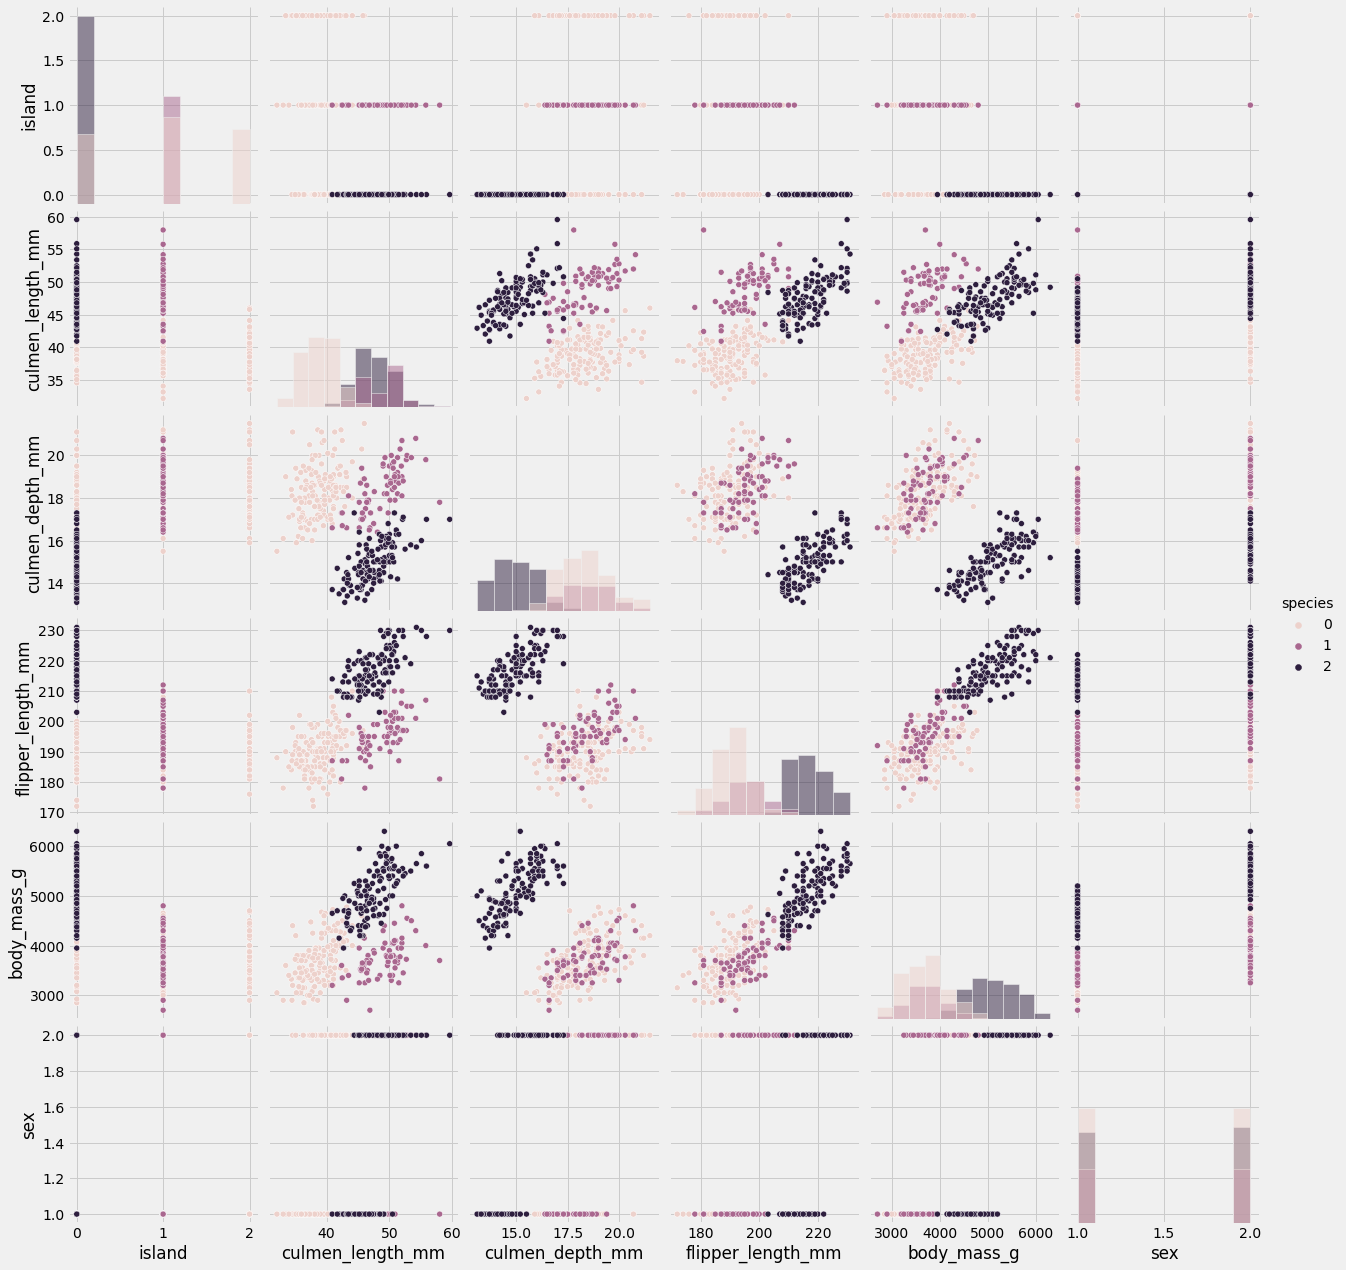

In [110]:
sns.pairplot(data=p_df, hue="species", size=3, diag_kind="hist")

## Longitud pico vs ancho pico


/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


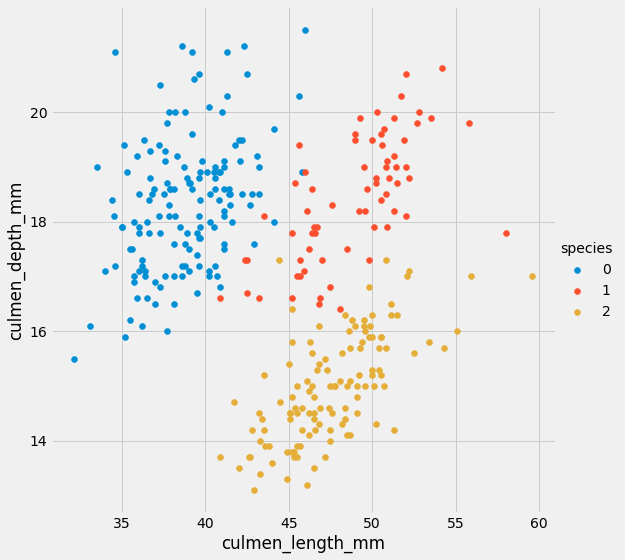

In [102]:
sns.FacetGrid(p_df, hue="species", size=8).map(plt.scatter, "culmen_length_mm", "culmen_depth_mm").add_legend()

## Longitud Pico vs Longitud Aleta

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


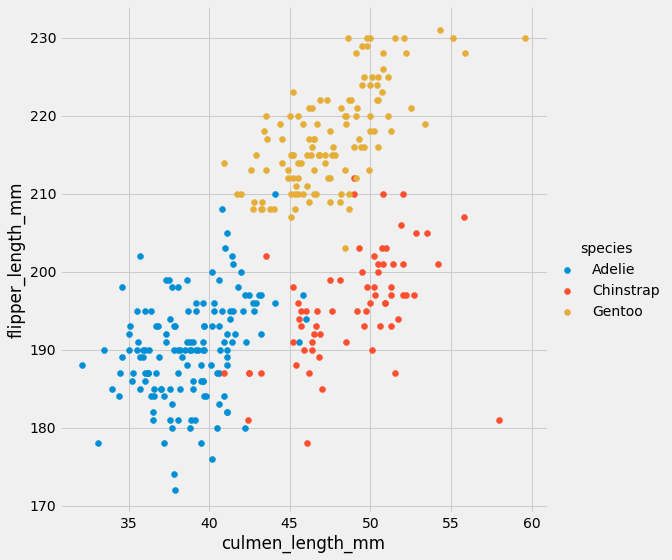

In [20]:
sns.FacetGrid(p_df, hue="species", size=8).map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()

<AxesSubplot:>

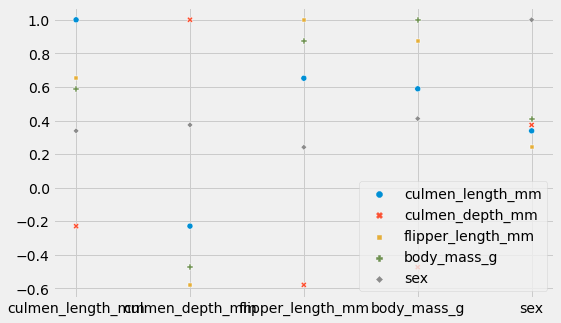

In [21]:
c_var = p_df.corr()
sns.scatterplot(data=c_var)

## Separamos los datos de entrenamiento de los de prueba

De esta forma tenemos un conjunto disponible para poder calcular sobre el la calidad de nuestro modelo.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
culmen_columns = ["culmen_length_mm", "culmen_depth_mm"]
target_column = 'species'

data, target = p_df[culmen_columns], p_df[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=0
)

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [24]:
## Copiado de documentacion de scikit


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax



## Modelos Lineales

Usando sklearn podemos usar modelos de regresion logistica para generar aproximaciones lineales.


In [25]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

Ahora graficamos

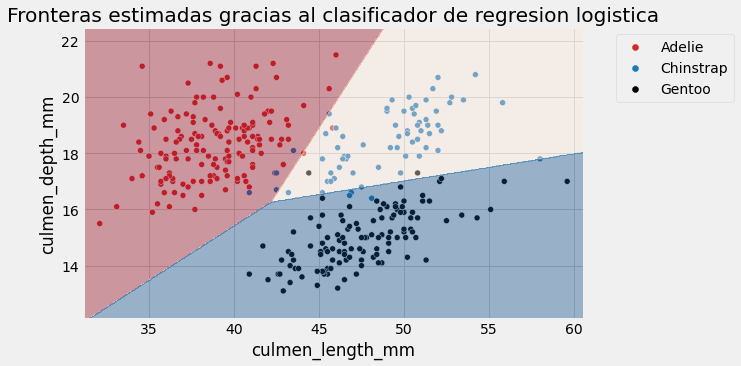

In [26]:
# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(linear_model, range_features, ax=ax)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Fronteras estimadas gracias al clasificador de regresion logistica")

In [27]:
test_score = linear_model.score(data_test, target_test)
print(f"Exactitud de la regresion logistica en datos prueba: {test_score:.2f}")


Exactitud de la regresion logistica en datos prueba: 0.96


In [28]:
# pinguino chinstrap imaginario
chinstrap_imaginario = [[50,20]]
gentoo_imaginario = [[45,14]]


print(f"Para un pinguino imaginario {chinstrap_imaginario} el resultado es: ({linear_model.predict(chinstrap_imaginario)})")
print(f"Para un pinguino imaginario {gentoo_imaginario} el resultado es: ({linear_model.predict(gentoo_imaginario)})")

Para un pinguino imaginario [[50, 20]] el resultado es: (['Chinstrap'])
Para un pinguino imaginario [[45, 14]] el resultado es: (['Gentoo'])


In [29]:
y_pred_proba = linear_model.predict_proba(chinstrap_imaginario)

# Otros clasificadores
## Clasificador de Arbol

Un arbol de clasificacion nos permite separar el espacio de entradas y partirlo considerando una sola feature a la vez.
Mientras mas profundidad, mayor dimensonalidad y mayor cantidad de variables que toma en cuenta para estimar.


In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(max_depth=1)
tree_1.fit(data_train, target_train)

tree_3 = DecisionTreeClassifier(max_depth=3)
tree_3.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

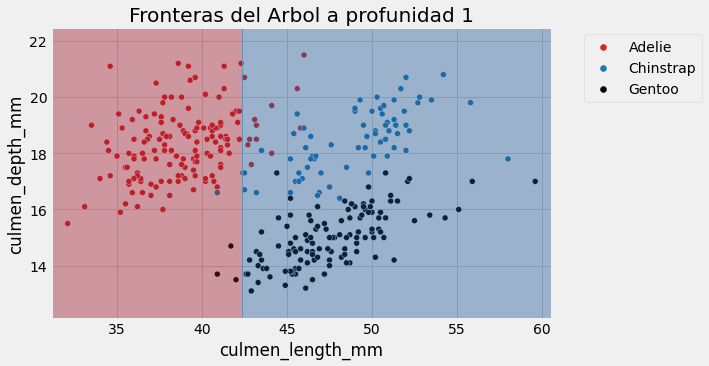

In [31]:
ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree_1, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Fronteras del Arbol a profunidad 1")

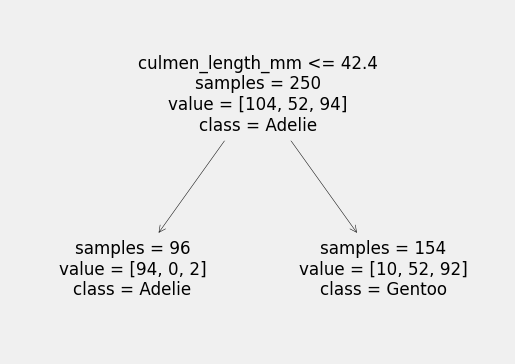

In [32]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree_1, feature_names=culmen_columns,
              class_names=tree_1.classes_, impurity=False, ax=ax)

In [33]:
pen_1 = [[41,0]]
print(f"Estimando a profundidad 1 para {pen_1} : {tree_1.predict(pen_1)}")
pen_1 = [[43,0]]
print(f"Estimando a profundidad 1 para {pen_1} : {tree_1.predict(pen_1)}")

Estimando a profundidad 1 para [[41, 0]] : ['Adelie']
Estimando a profundidad 1 para [[43, 0]] : ['Gentoo']


In [34]:
test_score = tree_1.score(data_test, target_test)
print(f"Exactitud Arbol profundidad 1 en datos prueba: {test_score:.2f}")

Exactitud Arbol profundidad 1 en datos prueba: 0.77


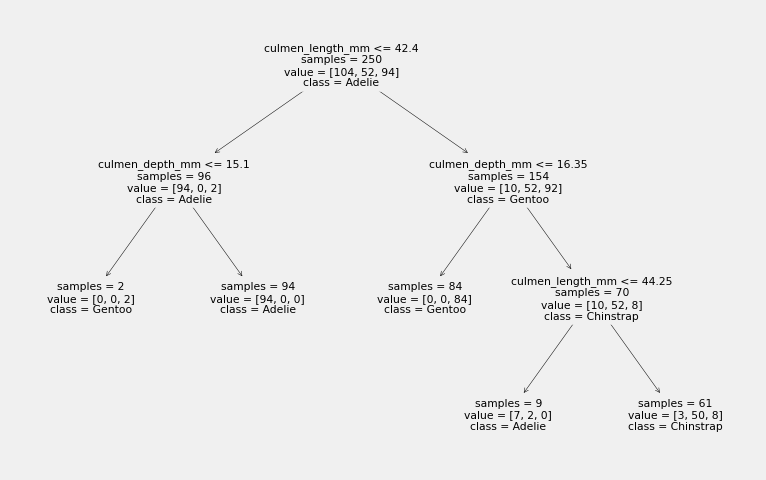

In [35]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(tree_3, feature_names=culmen_columns,
              class_names=tree_3.classes_, impurity=False, ax=ax)

In [36]:
test_score = tree_3.score(data_test, target_test)
print(f"Exactitud Arbol profundidad 3 en datos prueba: {test_score:.2f}")

Exactitud Arbol profundidad 3 en datos prueba: 0.94


In [37]:
tree_2 = DecisionTreeClassifier(max_depth=2)
tree_2.fit(data_train, target_train)

test_score = tree_2.score(data_test, target_test)
print(f"Exactitud Arbol profundidad 2 en datos prueba: {test_score:.2f}")

Exactitud Arbol profundidad 2 en datos prueba: 0.95


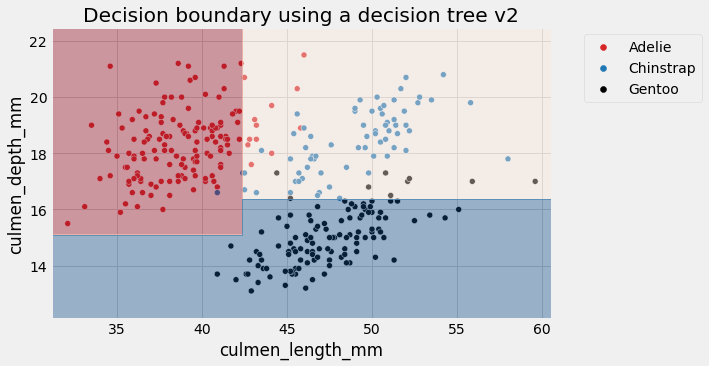

In [38]:
palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree_2, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree v2")

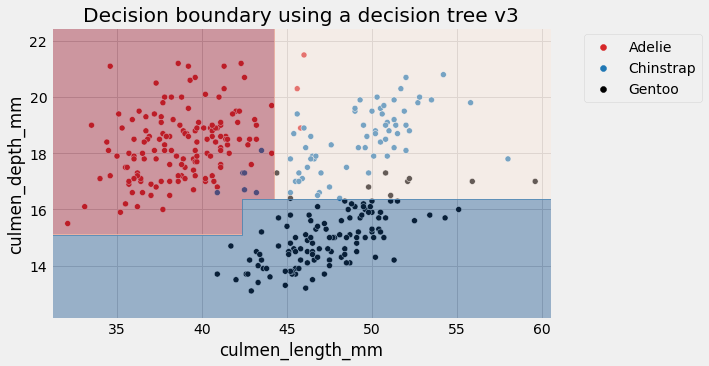

In [39]:
palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree_3, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree v3")

In [40]:
tree_6 = DecisionTreeClassifier(max_depth=6)
tree_6.fit(data_train, target_train)

test_score = tree_6.score(data_test, target_test)
print(f"Exactitud Arbol profundidad 6 en datos prueba: {test_score:.2f}")

Exactitud Arbol profundidad 6 en datos prueba: 0.95


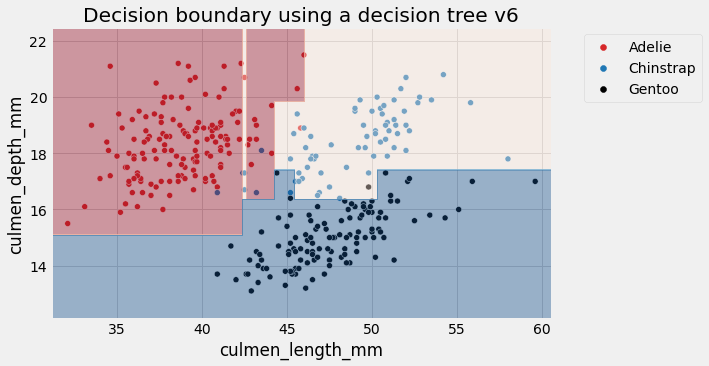

In [41]:
palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree_6, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree v6")

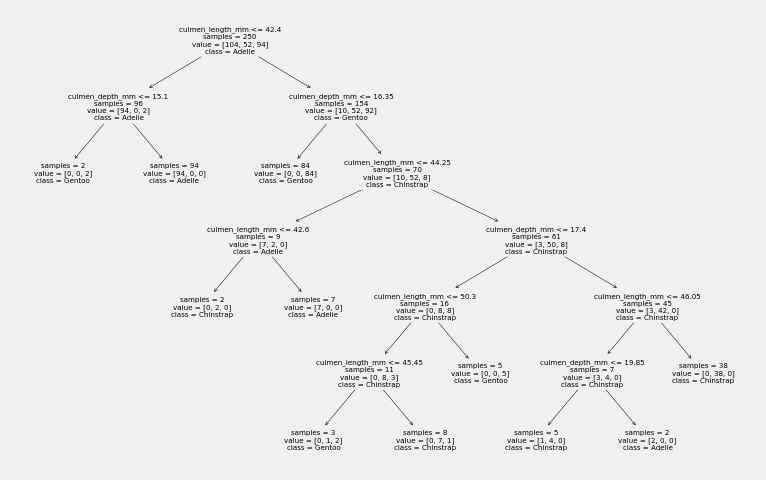

In [42]:
_, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(tree_6, feature_names=culmen_columns,
              class_names=tree_6.classes_, impurity=False, ax=ax)

# Clasificando por Sexo

In [56]:
p_df = p_df.drop(p_df[p_df.sex == 0].index)

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

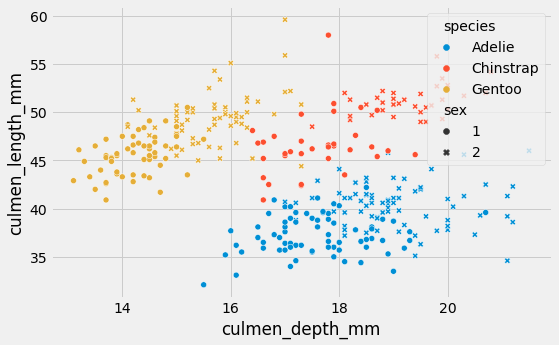

In [57]:
sns.scatterplot(data=p_df, x="culmen_depth_mm", y="culmen_length_mm", style="sex", hue="species")

In [63]:
print("¿Que especie tiene la longitud promedio de pico mayor?")
print("agrupamos por especie y sexo y graficamos")

especie_avg_df = p_df.loc[:,['species','culmen_length_mm','sex']]
especie_avg_df["avg_culmen_length"] = p_df.groupby(["species", "sex"])['culmen_length_mm'].transform("mean")
especie_avg_df["avg_culmen_depth"] = p_df.groupby(["species", "sex"])['culmen_depth_mm'].transform("mean")
especie_avg_df["avg_body_mass"] = p_df.groupby(["species", "sex"])['body_mass_g'].transform("mean")

¿Que especie tiene la longitud promedio de pico mayor?
agrupamos por especie y sexo y graficamos


<AxesSubplot:xlabel='avg_culmen_length', ylabel='species'>

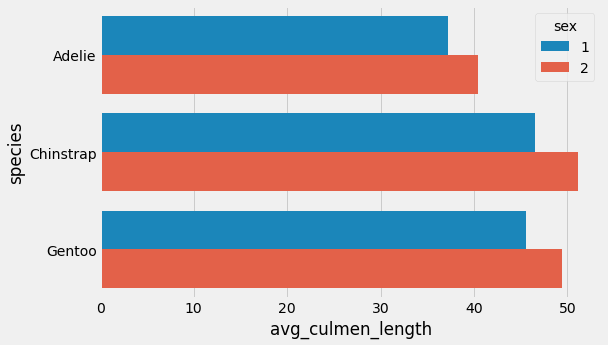

In [61]:
sns.barplot(data=especie_avg_df, x="avg_culmen_length", y="species", hue="sex")

<AxesSubplot:xlabel='avg_culmen_depth', ylabel='species'>

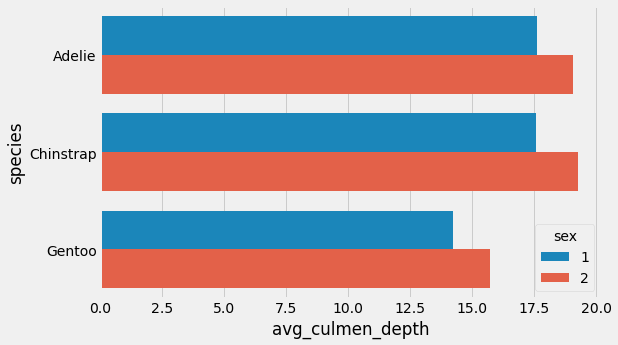

In [62]:
sns.barplot(data=especie_avg_df, x="avg_culmen_depth", y="species", hue="sex")

<AxesSubplot:xlabel='avg_body_mass', ylabel='species'>

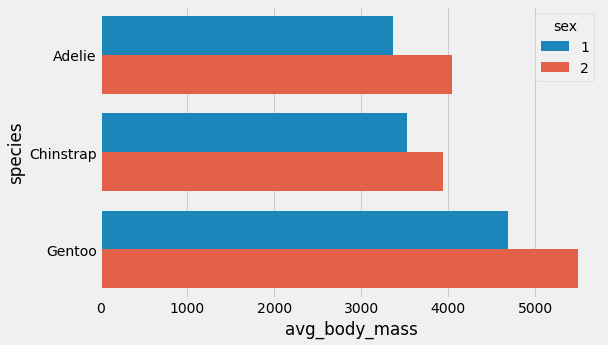

In [66]:
sns.barplot(data=especie_avg_df, x="avg_body_mass", y="species", hue="sex")


Encodificamos las variables categorias restantes: especie e isla

In [67]:
p_df['species'] = lb.fit_transform(p_df["species"])
p_df['species'].head()
p_df['island'] = lb.fit_transform(p_df["island"])
p_df['island'].head()

0    2
1    2
2    2
4    2
5    2
Name: island, dtype: int64

In [69]:
p_df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1
343,2,0,49.9,16.1,213.0,5400.0,2


Generar el modelo:

* escalar variables
* separar columnas de interés
* separar los datos en prueba y test
* generamos modelo
* probamos modelo


In [71]:
input_model_sx = p_df.drop("sex", axis=1)
target_model_sx = p_df["sex"]

from sklearn import preprocessing

input_model_sx = preprocessing.scale(input_model_sx)

In [72]:
i_X_train, i_X_test, t_y_train, t_y_test = train_test_split(input_model_sx, target_model_sx, random_state=13, test_size=0.2)

Habiendo pre-procesado avanzamos a crear el modelo.

In [73]:
sx_model = LogisticRegression().fit(i_X_train, t_y_train)
sx_predicted_test = sx_model.predict(i_X_test)

In [74]:
print(sx_model.score(i_X_test, t_y_test))

0.9402985074626866


Usando reportes un poco mas detallados podemos ver de mejor forma el rendimiento.


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [80]:
print("Reporte clasificativo")
print(classification_report(t_y_test, sx_predicted_test))
print("Matriz de confusion: Correctos, falsos positivos y falsos negativos \n"
      "Col: clase predichas \n"
      "Fila: Clase actual")
print(confusion_matrix(t_y_test, sx_predicted_test))

Reporte clasificativo
              precision    recall  f1-score   support

           1       0.97      0.91      0.94        34
           2       0.91      0.97      0.94        33

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

Matriz de confusion: Correctos, falsos positivos y falsos negativos 
Col: clase predichas 
Fila: Clase actual
[[31  3]
 [ 1 32]]


ROC CURVE


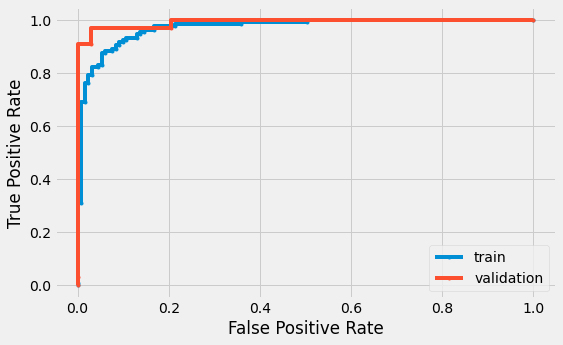

In [98]:
# ROC CURVE

print('ROC CURVE')
train_probs = sx_model.predict_proba(i_X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(t_y_train, train_probs1, pos_label=2)

test_probs = sx_model.predict_proba(i_X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(t_y_test, test_probs1, pos_label=2)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()